# Credit Card Fraud Detection with Python - Em Construção ...


## Contexto e objetivo

Neste conjunto de dados, mergulhamos nas transações de cartão de crédito na Europa durante setembro de 2013. Ao longo de dois dias, foram registradas 284.807 transações, sendo apenas 492 delas consideradas fraudulentas (0,172%). As variáveis são todas numéricas, resultado de uma transformação PCA (que além de reduzir a dimensionalidade dos dados, codificou os dados sensiveis para não expor as transações realizadas durante o periodo), com exceção de 'Time' (tempo) e 'Amount' (valor).

O principal propósito deste estudo é a criação de um modelo preditivo capaz de antecipar e identificar transações fraudulentas, utilizando o aprendizado adquirido por meio do dataset fornecido. A antecipação eficaz de fraudes é de extrema importância para as operadoras de cartões de crédito, visando a proteção dos clientes e a manutenção da integridade financeira. Ao desenvolver esse modelo,  buscamos fortalecer a capacidade de identificar comportamentos não autênticos, permitindo uma detecção precoce de atividades suspeitas e, assim, mitigando potenciais prejuízos.

---


Mais informações sobre o dataset pode ser encontrada atráves do kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install numpy
# !pip install imblearn
# !pip install scikit-learn

In [2]:
caminho = r'C:\Users\daler\Downloads\creditcard\creditcard.csv'

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import inflection

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn import metrics

# Desativar todos os warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(caminho)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há nenhum valor nulo no dataset

In [8]:
# Verificando a quantidade de fraudes no dataset
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: ylabel='count'>

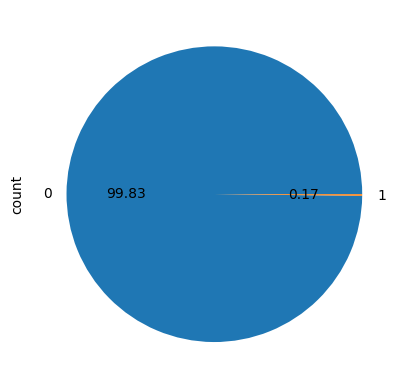

In [9]:
# Verificando visualmente a quantidade de fraudes no dataset
df.Class.value_counts().plot.pie(autopct='%.2f')

### Criando um modelo ML para identificar fraude

- Criando um modelo que identifique as fraudes antes de fazer qualquer alteração em nosso dataframe. Essa previsão servirá como guia para identificarmos se estamos indo na direção certa ou errada

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [12]:
# Verificando a distribuição das duas clases na base de treino e teste
y_train.value_counts()/y_train.shape[0]

Class
0    0.998271
1    0.001729
Name: count, dtype: float64

In [13]:
y_test.value_counts()/y_test.shape[0]

Class
0    0.998276
1    0.001724
Name: count, dtype: float64

Iremos manter a mesma porcentagem de respostas no teste e no treino para melhorar a eficiencia da nossa previsão

In [14]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [15]:
# Treinando nosso modelo
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

In [16]:
# Fazendo a previsão
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9991594582229457

### Verificando agora a matriz de confusão, a precisão e o recall

A matriz de confusão é uma ferramenta crucial para avaliar o desempenho de um modelo de classificação. Essa matriz compara as previsões feitas pelo modelo com as classes reais dos dados.

A matriz de confusão tem quatro quadrantes:

- Verdadeiros Positivos (TP): Número de observações da classe positiva corretamente previstas pelo modelo.

- Falsos Positivos (FP): Número de observações da classe negativa erroneamente previstas como pertencentes à classe positiva.

- Verdadeiros Negativos (TN): Número de observações da classe negativa corretamente previstas pelo modelo.

- Falsos Negativos (FN): Número de observações da classe positiva erroneamente previstas como pertencentes à classe negativa.

In [17]:
confusion_matrix(y_test, y_pred)

array([[93786,    39],
       [   40,   122]], dtype=int64)

A função precision_score é uma métrica que mede a proporção de instâncias positivas classificadas corretamente em relação ao total de instâncias positivas previstas pelo modelo.

O resultado é uma taxa de acerto calculada pela formula Precisão = TP / (TP + FP). Desse modo quando menor o numero de Falsos Positivos (menor será o quociente) maior a precisão verdadeira do nosso modelo

In [18]:
precision_score(y_test, y_pred)

0.7577639751552795

O recall é similar ao precision_score, é uma métrica que mede a proporção de instâncias positivas classificadas corretamente em relação ao total de instâncias positivas previstas pelo modelo medindo a proporção de verdadeiros positivos em relação ao total de instâncias positivas reais.

O resultado é uma taxa de acerto calculada pela formula Precisão = TP / (TP + FN). Desse modo quando menor o numero de Falsos Negativos (menor será o quociente) maior a precisão verdadeira do nosso modelo

O recall é particularmente importante em situações onde não podemos nos dar ao luxo de perder positivos reais, como na detecção de fraudes em cartões de crédito. Uma alta taxa de recall indica que o modelo está capturando efetivamente a maioria das transações fraudulentas, reduzindo o número de fraudes que passam despercebidas.

In [19]:
recall_score(y_test, y_pred)

0.7530864197530864

In [20]:
predicts = {}

previsoesCC = 'previsoesCC'
listagem = [y_pred, 2, 3, 4, 5, 6, 7, 8]

predicts[previsoesCC] = listagem

predicts

y_pred_recuperado = predicts[previsoesCC][0]
y_pred_recuperado

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
predicts = {}
predicts_proba = {}

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Função que realiza o treinamento e avalia o modelo, retornando os resultados em uma tabela.
def table_score(X_train, X_test, Y_train, y_test):

    def plot_confusion_matrix(ax, cm, labels, title='Matriz de Confusão', cmap=plt.cm.Blues):
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
                    xticklabels=labels, yticklabels=labels, ax=ax)
        ax.set_xlabel('Previsto')
        ax.set_ylabel('Real')
        ax.set_title(title)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Logistic Regression
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train, Y_train)
    Y_pred_logreg = logreg.predict(X_test)
    Y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]
    acc_log = round(accuracy_score(y_test, Y_pred_logreg) * 100, 2)
    ps_log = round(precision_score(y_test, Y_pred_logreg) * 100, 2)
    rs_log = round(recall_score(y_test, Y_pred_logreg) * 100, 2)
    cm_log = confusion_matrix(y_test, Y_pred_logreg)
    plot_confusion_matrix(axes[0, 0], cm_log, ['Não Fraude', 'Fraude'], f'Logistic Regression\nAcurácia: {acc_log}%\nPrecisão: {ps_log}%\nRecall: {rs_log}%', cmap='Blues')

    # KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    Y_pred_knn_proba = knn.predict_proba(X_test)[:, 1]
    acc_knn = round(accuracy_score(y_test, Y_pred_knn) * 100, 2)
    ps_knn = round(precision_score(y_test, Y_pred_knn) * 100, 2)
    rs_knn = round(recall_score(y_test, Y_pred_knn) * 100, 2)
    cm_knn = confusion_matrix(y_test, Y_pred_knn)
    plot_confusion_matrix(axes[0, 1], cm_knn, ['Não Fraude', 'Fraude'], f'KNN\nAcurácia: {acc_knn}%\nPrecisão: {ps_knn}%\nRecall: {rs_knn}%', cmap='Greens')

    # Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train, Y_train)
    Y_pred_dt = decision_tree.predict(X_test)
    Y_pred_dt_proba = decision_tree.predict_proba(X_test)[:, 1]
    acc_decision_tree = round(accuracy_score(y_test, Y_pred_dt) * 100, 2)
    ps_decision_tree = round(precision_score(y_test, Y_pred_dt) * 100, 2)
    rs_decision_tree = round(recall_score(y_test, Y_pred_dt) * 100, 2)
    cm_decision_tree = confusion_matrix(y_test, Y_pred_dt)
    plot_confusion_matrix(axes[1, 0], cm_decision_tree, ['Não Fraude', 'Fraude'], f'Decision Tree\nAcurácia: {acc_decision_tree}%\nPrecisão: {ps_decision_tree}%\nRecall: {rs_decision_tree}%', cmap='Oranges')

    # Random Forest
    random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
    random_forest.fit(X_train, Y_train)
    Y_pred_rf = random_forest.predict(X_test)
    Y_pred_rf_proba = random_forest.predict_proba(X_test)[:, 1]
    acc_random_forest = round(accuracy_score(y_test, Y_pred_rf) * 100, 2)
    ps_random_forest = round(precision_score(y_test, Y_pred_rf) * 100, 2)
    rs_random_forest = round(recall_score(y_test, Y_pred_rf) * 100, 2)
    cm_random_forest = confusion_matrix(y_test, Y_pred_rf)
    plot_confusion_matrix(axes[1, 1], cm_random_forest, ['Não Fraude', 'Fraude'], f'Random Forest\nAcurácia: {acc_random_forest}%\nPrecisão: {ps_random_forest}%\nRecall: {rs_random_forest}%', cmap='Reds')

    plt.tight_layout()
    plt.show()

    models = pd.DataFrame({
        'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
        'Score': [acc_knn, acc_log, acc_decision_tree, acc_random_forest],
        'Precision': [ps_knn, ps_log, ps_decision_tree, ps_random_forest],
        'Recall': [rs_knn, rs_log, rs_decision_tree, rs_random_forest]
    })
    models = models.sort_values(by='Recall', ascending=False)
    
    previsoes = [Y_pred_logreg, Y_pred_knn, Y_pred_dt, Y_pred_rf]
    prev_proba = [Y_pred_logreg_proba, Y_pred_knn_proba, Y_pred_dt_proba, Y_pred_rf_proba]
    
    return previsoes, prev_proba

In [22]:
# Plotando gráfico com a matrix de confusão
def plot_confusion_matrix(y_test, y_pred):
    
    acc_decision_tree = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    rs_decision_tree = round(recall_score(y_test, y_pred) * 100, 2)
    
    ps_decision_tree = round(precision_score(y_test, y_pred) * 100, 2)
    
    cm = confusion_matrix(y_test, y_pred)
    
    labels = ['Não Fraude', 'Fraude']
    title = f'Decision Tree\nAcurácia: {acc_decision_tree}%\nPrecisão: {ps_decision_tree}%\nRecall: {rs_decision_tree}%'
    
    fig, ax = plt.subplots() 
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=True,
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Previsto')
    ax.set_ylabel('Real')
    ax.set_title(title)

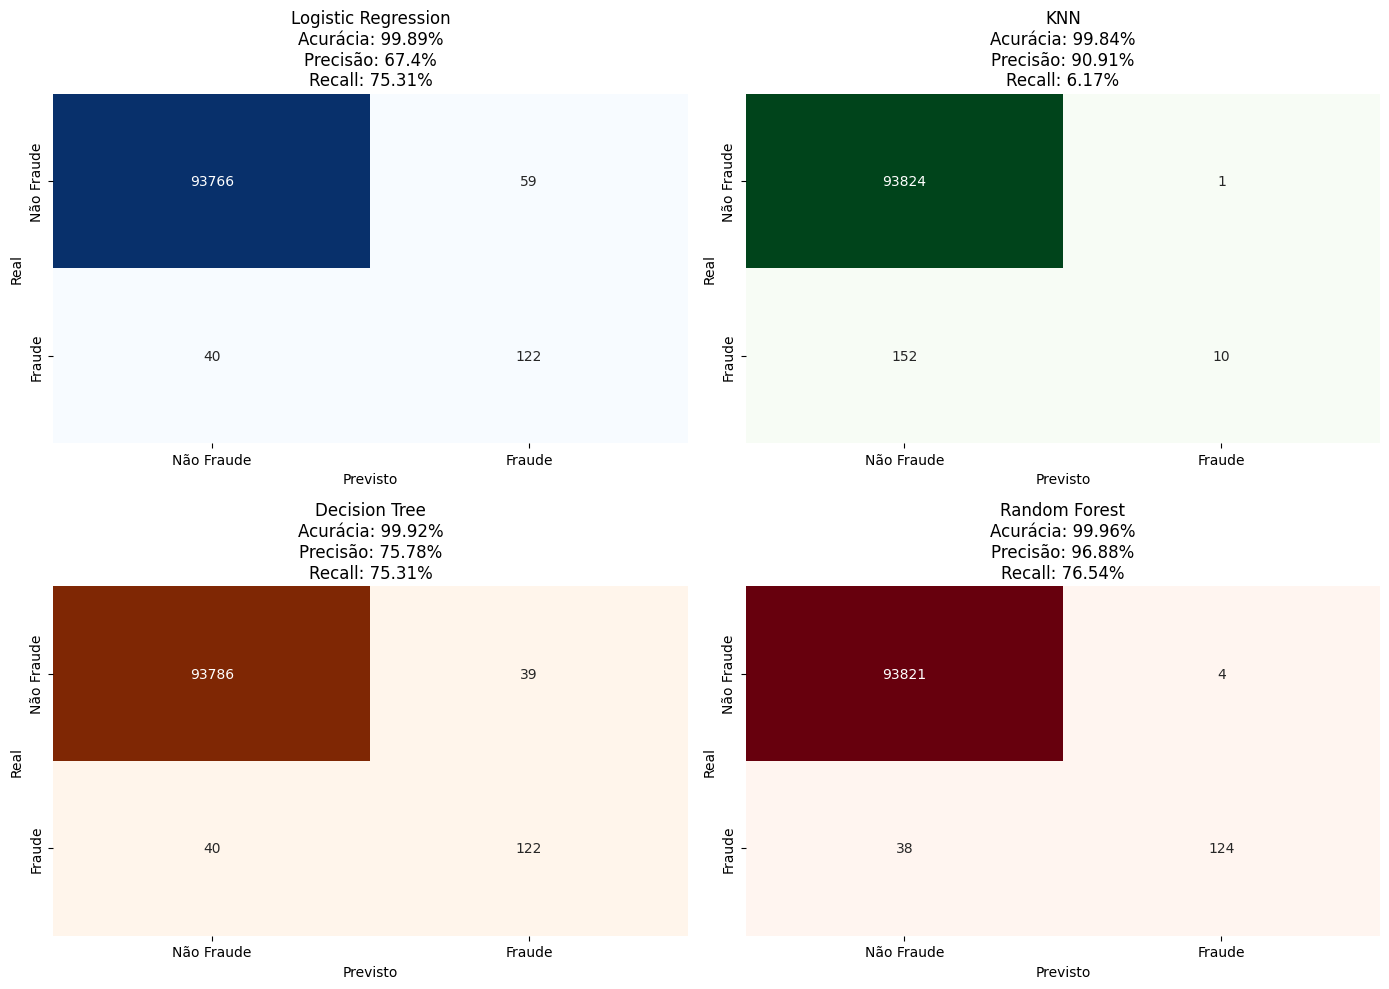

In [23]:
predicts['original_df'], predicts_proba['original_df'] = table_score(X_train, X_test, y_train, y_test)
warnings.filterwarnings("ignore")

## 1º Avaliação do modelo e discussão dos motivos

Embora nosso modelo tenha apontado algo próximo de 100% de acurácia, quando realizamos o teste com a precisão e o recall esse valor fica em torno de 75%. Isso pode estar ocorrendo por conta do dataset estar desbalanceado. Em outras palavras, a prevalência de uma classe sobre a outra está influenciando nossas métricas.

O desbalanceamento impacta a previsão de diversas maneiras. No contexto da detecção de fraudes, em que as transações fraudulentas são raras em comparação com as legítimas, o modelo pode se inclinar a prever mais transações como verdadeiros positivos (TP). Essa inclinação pode levar a uma acurácia aparentemente elevada, pois acerta a maioria das previsões na classe majoritária.

Portanto, ao lidar com conjuntos de dados desbalanceados, é crucial considerar métricas além da acurácia. É preciso encontrar um equilíbrio que leve em conta tanto a identificação correta de transações fraudulentas (recall) quanto a minimização de classificações incorretas (precisão), adaptando a estratégia do modelo às características específicas do problema em questão.







## Trabalhando com datasets desbalanceados

- Para trabalhar o dataset desbalanceado, vamos usar a bilioteca imbalanced-learn
    - https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Balanceando o dataset
- Temos 2 classes:
    - Classe majoritária: a que possui mais registros
    - Classe minoritária: a que possui menos registros
- Podemos balancear o dataset reduzindo os registros da classe majoritária (com mais registros) ou aumentando os registros da classe minoritária (com menos registros)

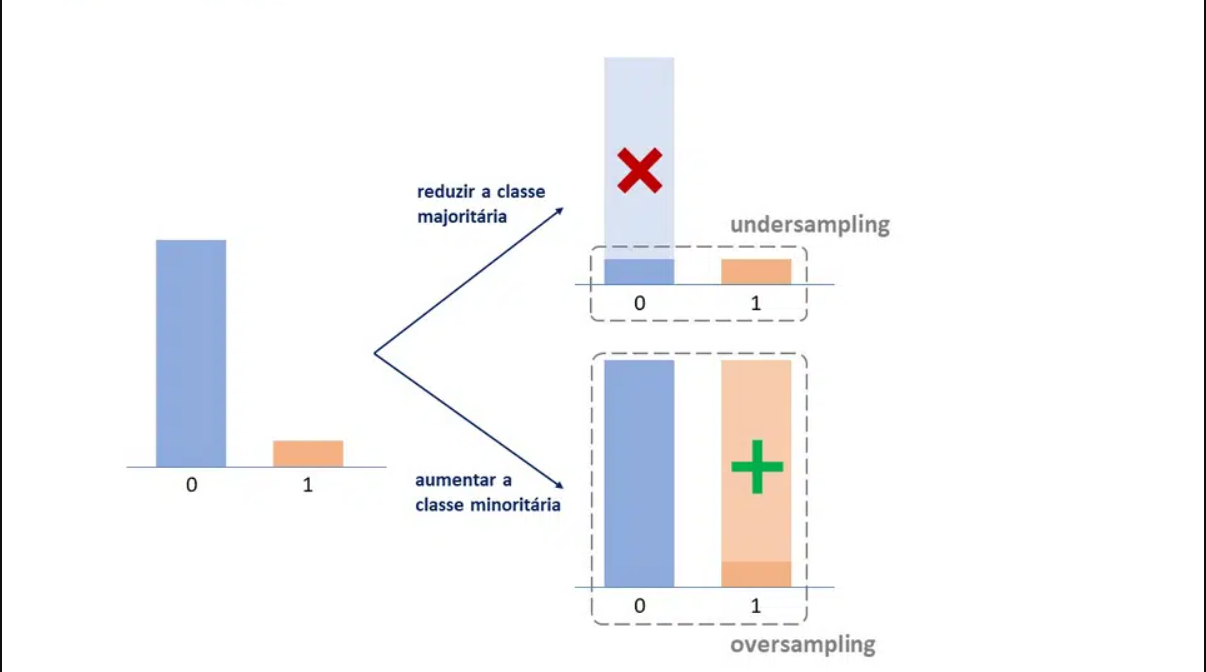

### Reduzindo os registros da classe majoritária
- Vamos retirar dados da classe que possui mais registros
    - Precisamos ter cuidado para que essa retirada não acabe causando perda de  informação (retirando informações que são muito importantes)
    - Também é necessário verificar o tamanho da base restante
- Podemos começar fazendo isso excluindo registros de forma aleatória com o https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
rus = RandomUnderSampler(random_state=42)

In [26]:
X_res, y_res = rus.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

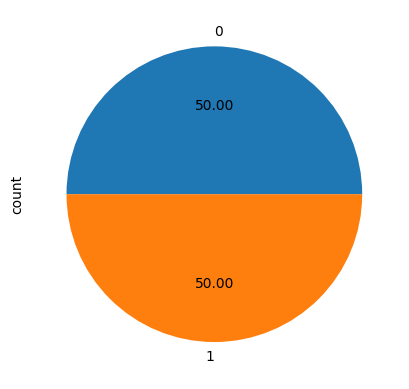

In [27]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [28]:
y_res.value_counts()

Class
0    330
1    330
Name: count, dtype: int64

### Aumentando os registros da classe minoritária
- Duplicando os valores de maneira aleatória com o https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
    - Precisamos garantir que não vamos ter overfitting por mostrar ao modelo várias vezes os mesmos dados

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros = RandomOverSampler(random_state=42)

In [31]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [32]:
y_ros.value_counts()

Class
0    190490
1    190490
Name: count, dtype: int64

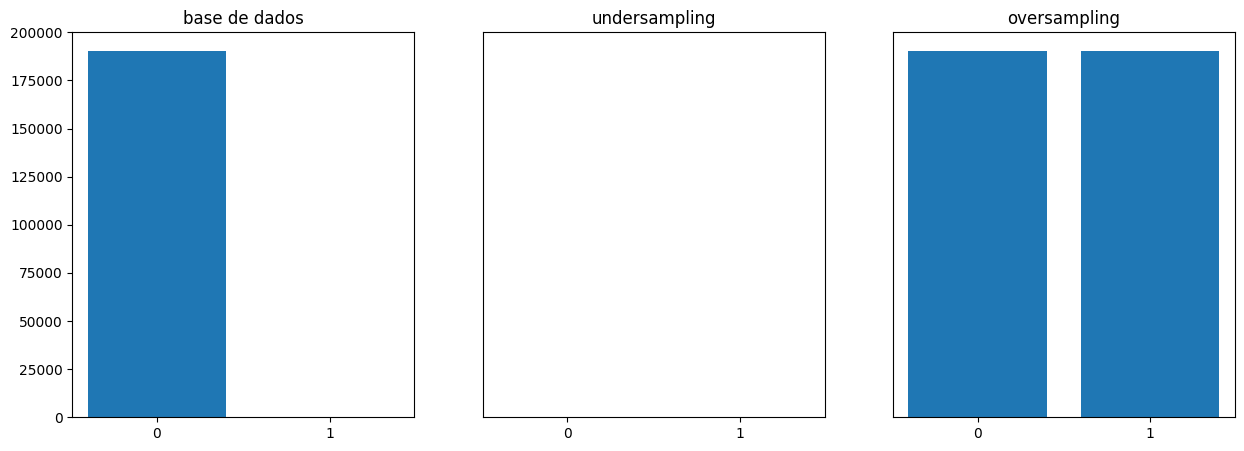

In [33]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].bar(y_train.value_counts().index, y_train.value_counts().values)
ax[1].bar(y_res.value_counts().index, y_res.value_counts().values)
ax[2].bar(y_ros.value_counts().index, y_ros.value_counts().values)  # Assume y_ros is the correct variable for labels

ax[0].set(ylim=(0, 200000), xticks=[0, 1])
ax[0].set_title('base de dados')
ax[1].set(ylim=(0, 200000), xticks=[0, 1], yticks=[])
ax[1].set_title('undersampling')
ax[2].set(ylim=(0, 200000), xticks=[0, 1], yticks=[])
ax[2].set_title('oversampling')

plt.show()

In [34]:
# Treinando nosso modelo
clfRO = tree.DecisionTreeClassifier(random_state=42)
clfRO = clfRO.fit(X_ros, y_ros)
y_predRO = clfRO.predict(X_test)


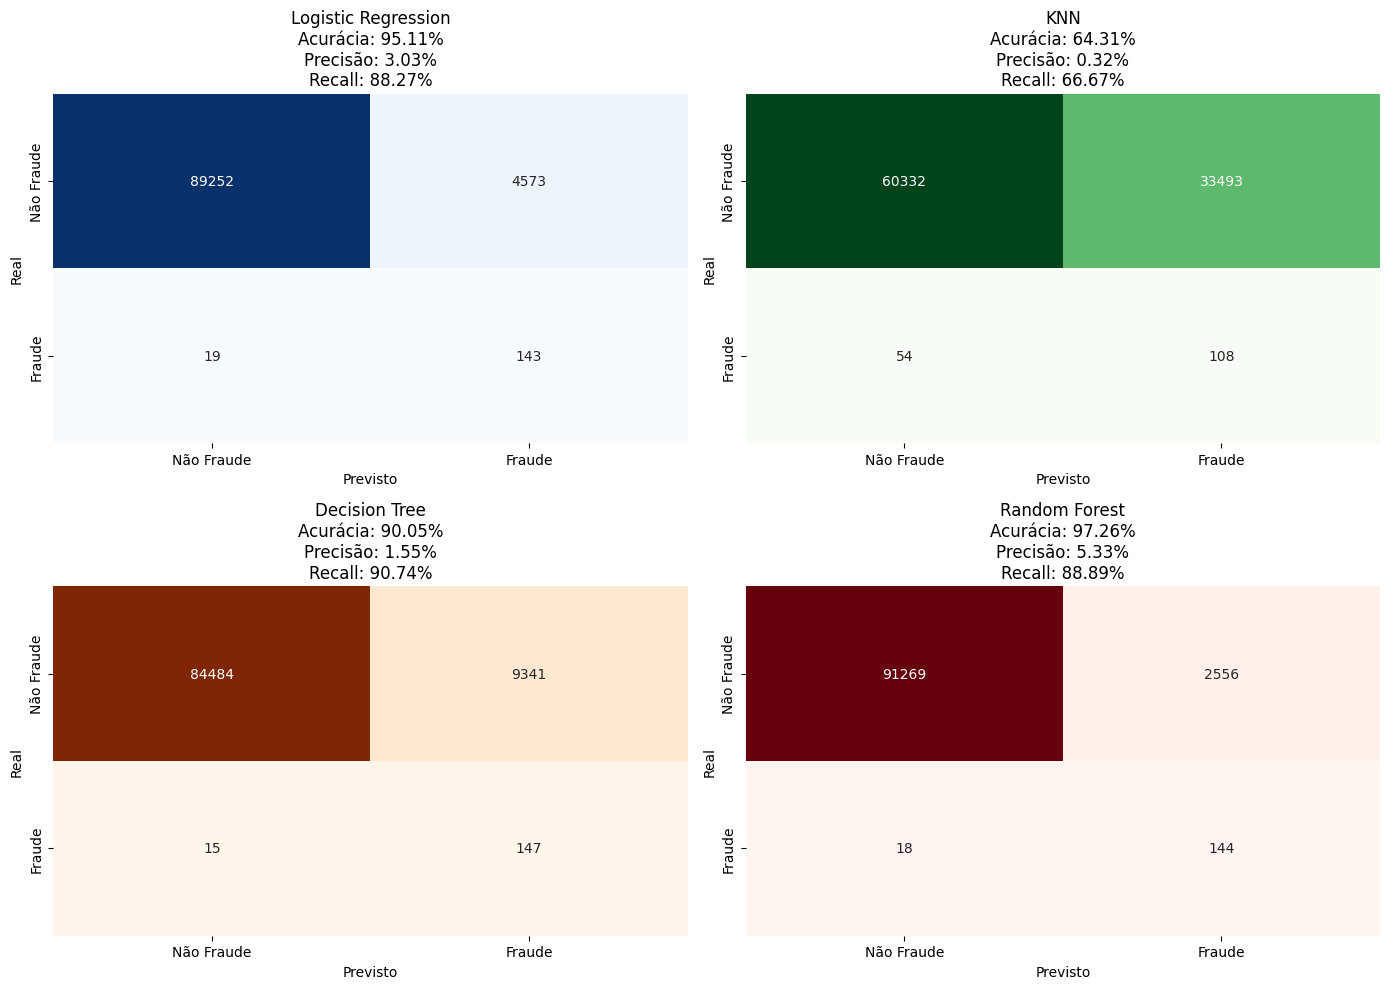

In [35]:
predicts['undersampling'], predicts_proba['undersampling'] = table_score(X_res, X_test, y_res, y_test)

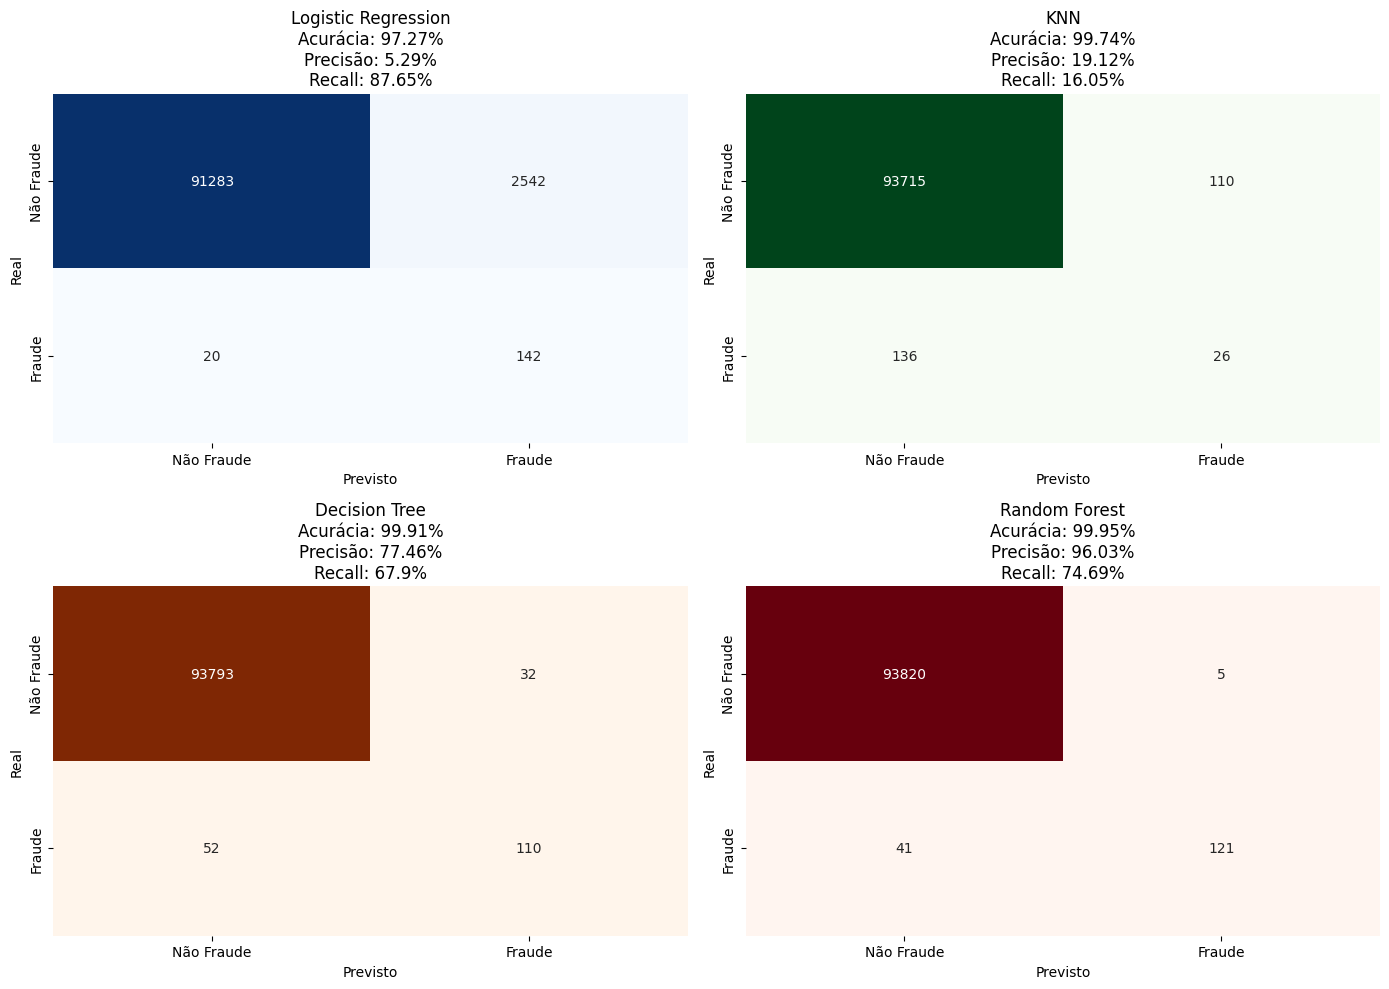

In [36]:
predicts['oversampling'], predicts_proba['oversampling'] = table_score(X_ros, X_test, y_ros, y_test)

## 2º Avaliação -> 

- Para RandomUnderSampling realizando o balanceamento do dataset, o modelo conseguiu uma melhora de aproximadamente 15% no Recall com o método Random Forest, porem nossa precisão cairam para niveis baixissimos (menos de 5% na maioria). Isso acontece porque agora os nossos dados passou a classificar mais previsões como fraude. Embora ela aumentou seu acerto verdadeiro (TP), ela passou a errar muito mais, assim realizando varias previsões como falso positivo (FP) 

- Para RandomOverSampling realizando o balanceamento do dataset, o modelo apresentou uma piora no recall, prevendo menos casos verdadeiramente positivos. Isso ocorre porque no ROS ocorre apenas a duplicação dos dados da classe minoritária, sendo assim o modelo pode apenas "decorar" (overfitting) e não aprender de fato com os dados apresentado.

- A seguir tentaremos balancear o dataset de forma mais eficientes a fim de melhorar a nossa previsão com o Recall e também a Precisão.

### Under Sampling com métodos diferentes

### ClusterCentroids 

O metodo ClusterCentroids é utilizada para realizar o subamostragem (undersampling) por meio do método de centroides de clusters. 

O ClusterCentroids organizam os dados semelhantes/centrados em 'centros' diferentes e selecionam o centro de cada um desses semelhantes a fim de equilibrar os dados distintos e reduzir a redundancia na subamostragem determinada. Isso ajuda a equilibrar as classes, tornando o conjunto de dados mais propício para treinar modelos que não sejam tendenciosos em direção à classe majoritária.

Em resumo, o ClusterCentroids analisa todos os dados do conjunto e seleciona os dados que melhor representam o conjunto como um todo.

In [37]:
from imblearn.under_sampling import ClusterCentroids

In [38]:
# Aplicando o ClusterCentroids
cc = ClusterCentroids(sampling_strategy='auto', random_state=42)
X_resampled_cc, y_resampled_cc = cc.fit_resample(X_train, y_train)

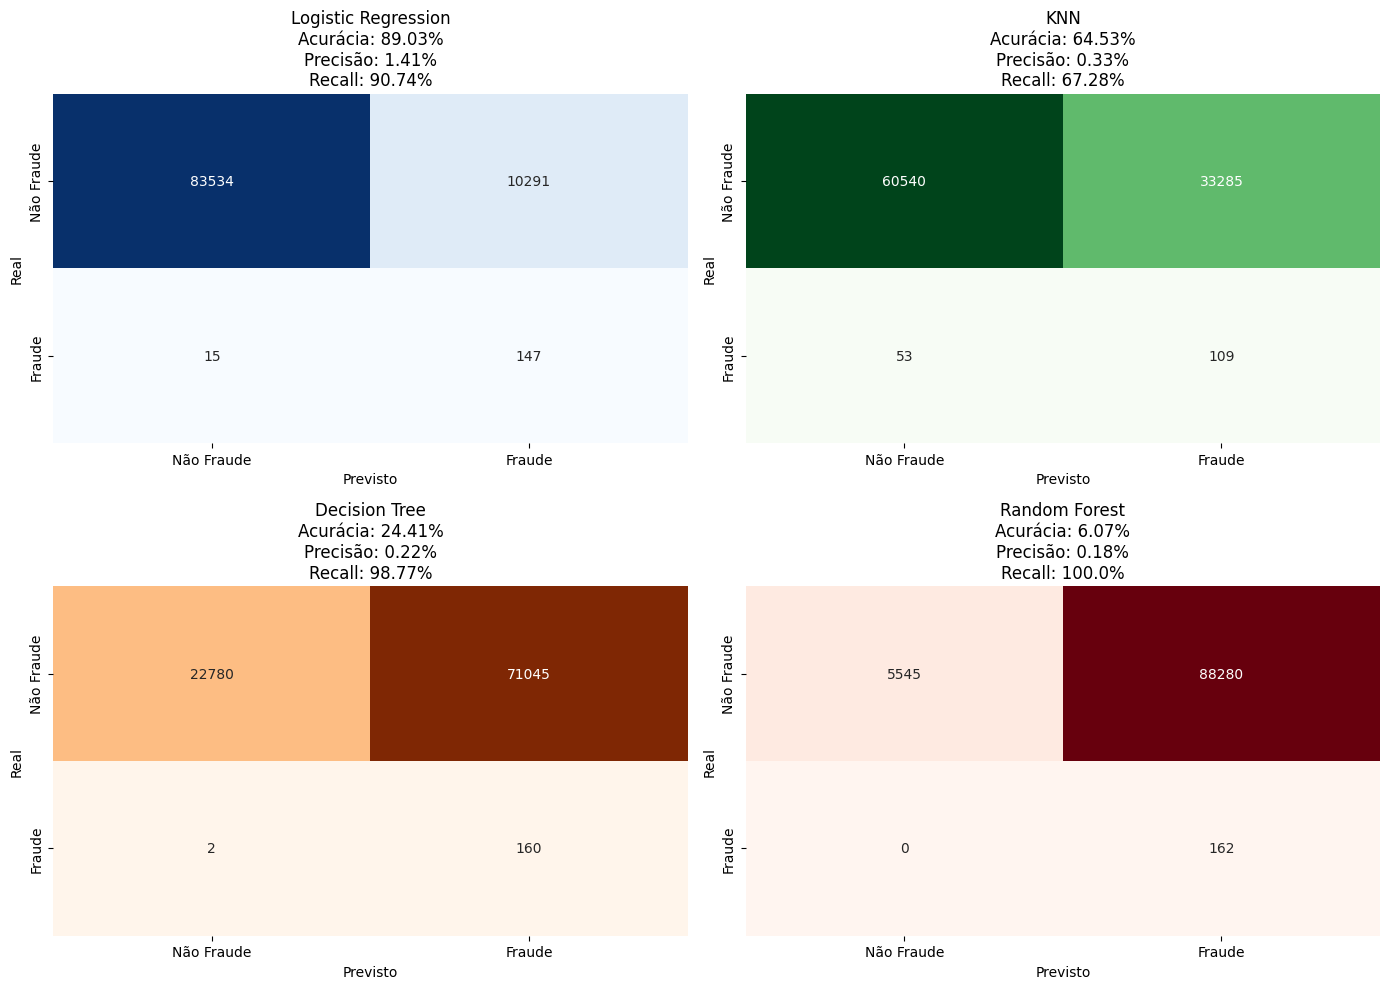

In [39]:
warnings.filterwarnings("ignore")
predicts['cluster_centroids'], predicts_proba['cluster_centroids'] = table_score(X_resampled_cc, X_test, y_resampled_cc, y_test)

### NearMiss
Utiliza um metodo diferente de seleção, realizando under_sampling. Usa o KNN (KNearestNeighbors) para a seleção

A ideia principal do NearMiss é garantir que os dados da classe majoritária escolhidas estejam próximas ou "perto" dos dados da classe minoritária em termos de distância, com o intuito de capturar melhor a complexidade da classe minoritária.

In [40]:
# Fazendo a reamostragem utilizando o NearMiss 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_resampled_nm, y_resampled_nm = nm.fit_resample(X_train, y_train)

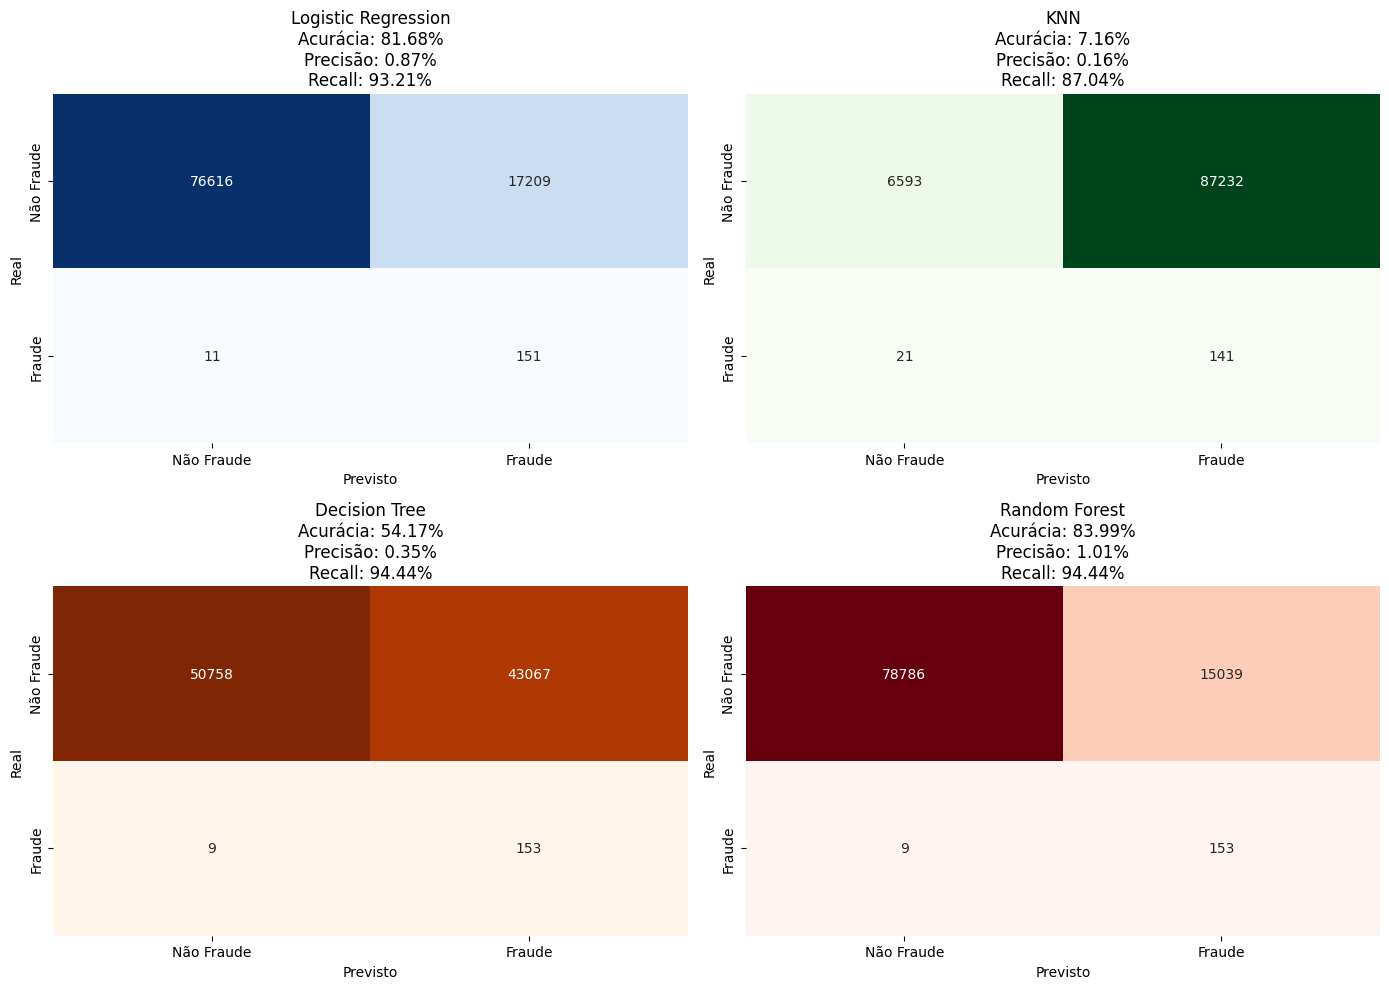

In [41]:
# NearMiss predict
warnings.filterwarnings("ignore")
predicts['near_miss'], predicts_proba['near_miss'] = table_score(X_resampled_nm, X_test, y_resampled_nm, y_test)

### Over Sampling com métodos diferentes
- Um dos principais problemas realizando o OverSampling diretamente, principalmente quando o dataset é muito desbalanceado, é os dados da classe minoritária são apenas copiados/clonados. E o uso desse método pode acabar causando um overfitting (viciando ou memorizando os dados presentes)

*Verificar e comprovar o que está sendo dito


### Shrinkage

- Para evitar que problemas como esse ocorram, podemos passar o parametro 'shrinkage' que realiza uma 'suavização' dos dados, alterando valores para mais e para menos, a fim de melhorar o treinamento do modelo ML 

In [42]:
# Suavizando os dados de teste 
ros = RandomOverSampler(random_state=42, shrinkage=1.2)

# Refazendo a amostra
X_ros_shrinkage, y_ros_shrinkage = ros.fit_resample(X_train, y_train)

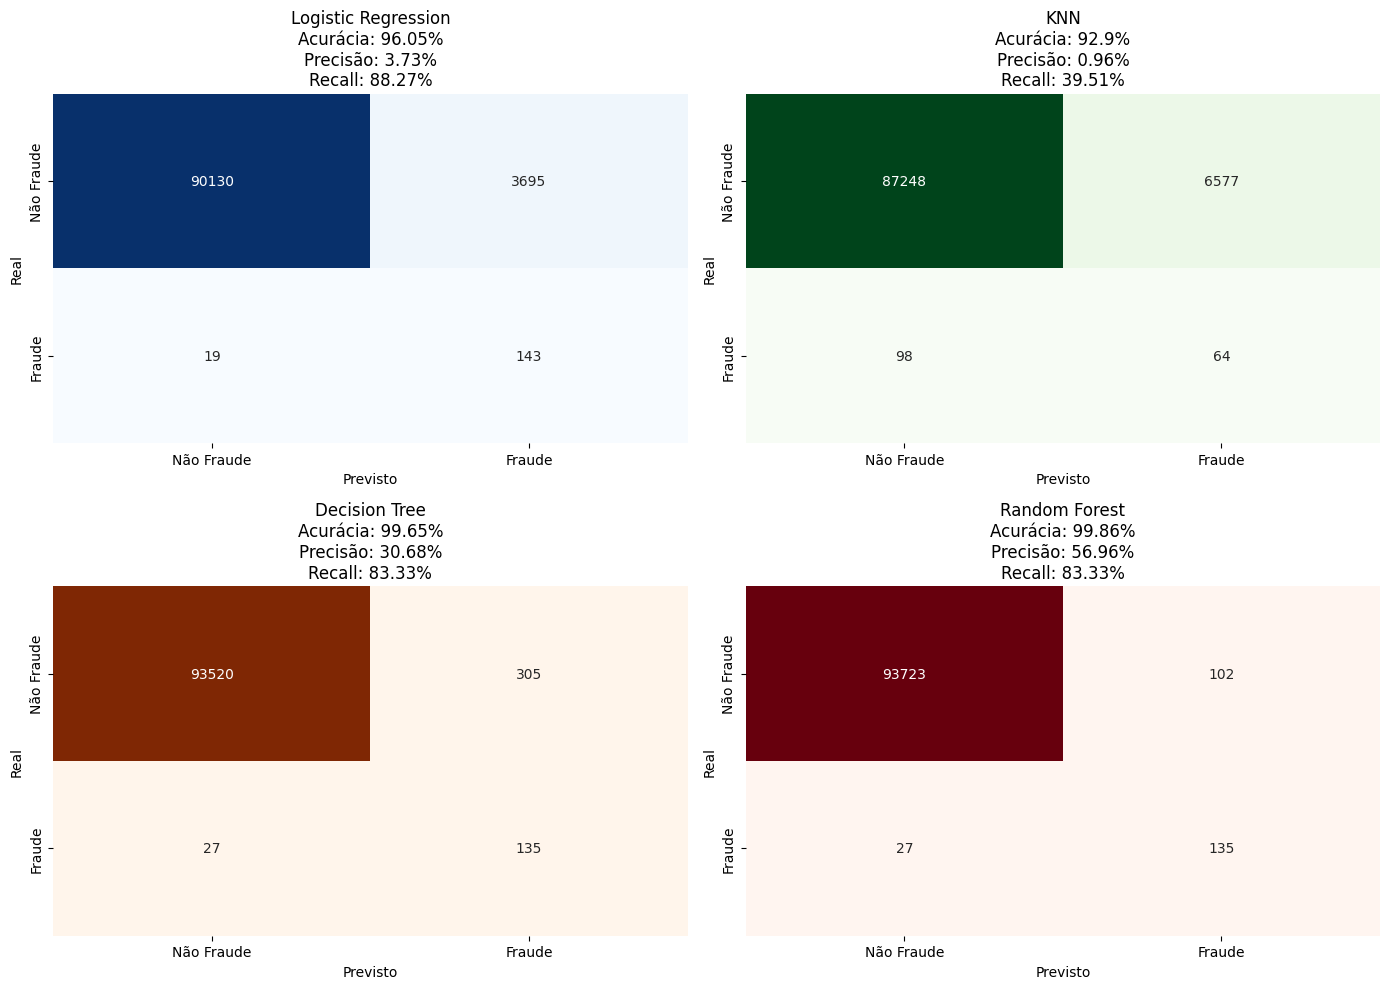

In [43]:
# Gráfico
predicts['shrinkage'], predicts_proba['shrinkage'] = table_score(X_ros_shrinkage, X_test, y_ros_shrinkage, y_test)

### SMOTE (Especialmente para classificação binária)
- Ao invés de duplicar os valores, serão geradas novas amostras utilizando o KNN
- Encontra os k vizinhos mais próximos dos dados selecionados e gera amostras sintéticas, utilizando proporções especificadas e adiciona essas amostras ao conjunto de dados afim de balancear o dataset

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)


X_ros_smote, y_ros_smote = sm.fit_resample(X_train, y_train)

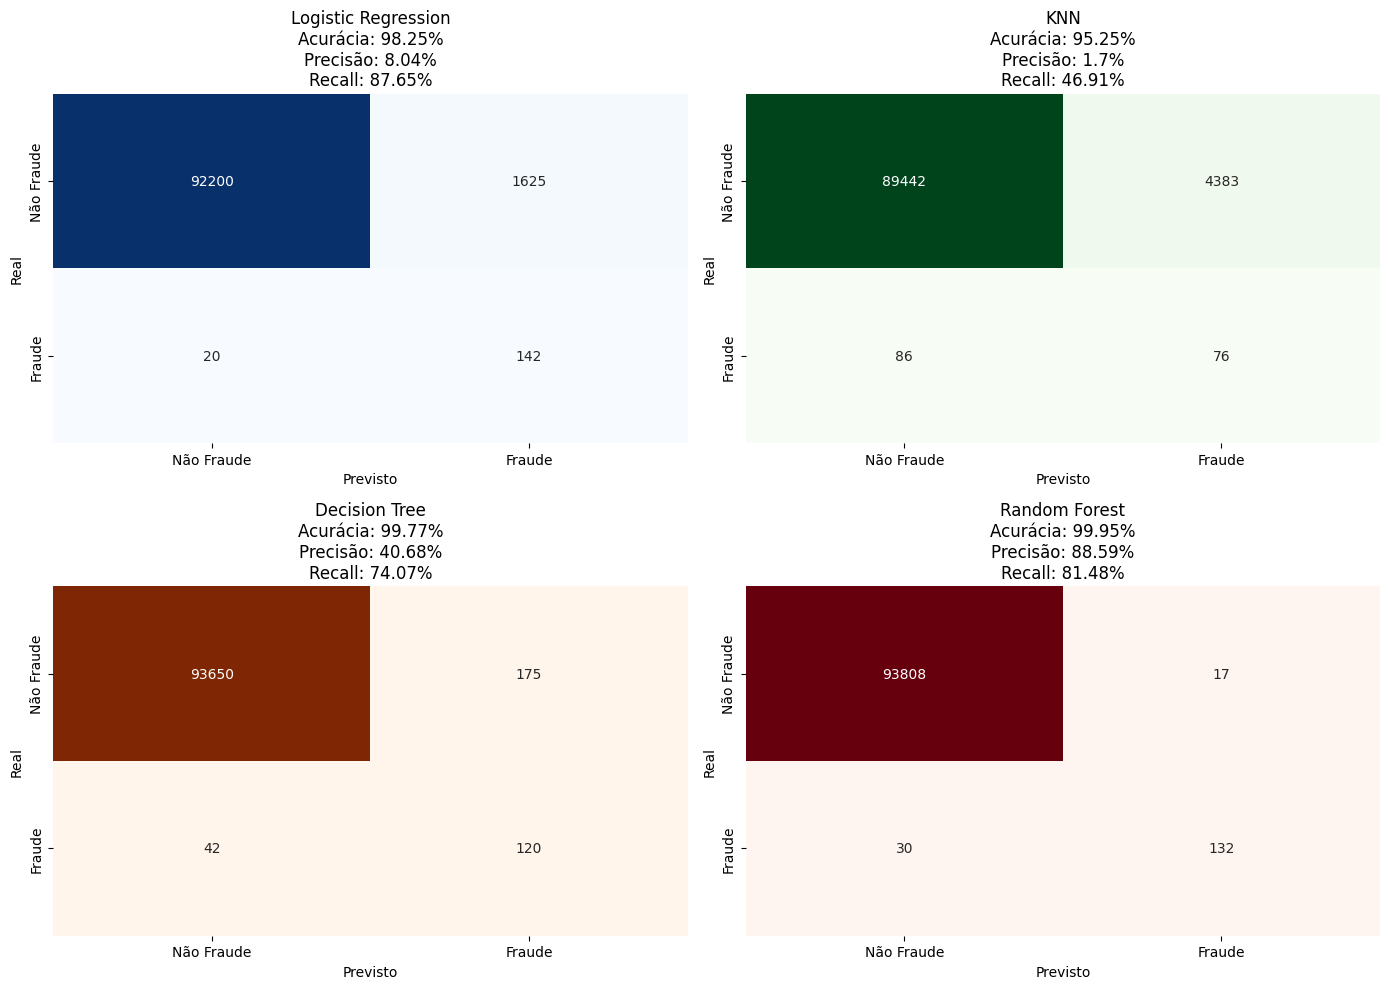

In [45]:
# Gráfico
predicts['smote'], predicts_proba['smote'] = table_score(X_ros_smote, X_test, y_ros_smote, y_test)

### ADASYN (Especialmente para classificação binária)
- Semelhante ao SMOTE, o ADASYN é uma extensão do mesmo e trabalha fazendo um cálculo de densidade afim gerar amostras sintéticas com base na distribuição local dos dados, desse modo o método consegue dar mais enfâse à regiões mais densas (onde é mais complicado dinstinguir classes minoritárias de majoritárias)
- Sendo assim ele se realiza uma adaptação mais dinâmica às caracteristicas mais densas (semelhantes a classe majoritária)

In [46]:
from imblearn.over_sampling import ADASYN

# Refazendo a amostra
ada = ADASYN(random_state=42)
X_ros_ada, y_ros_ada = ada.fit_resample(X_train, y_train)

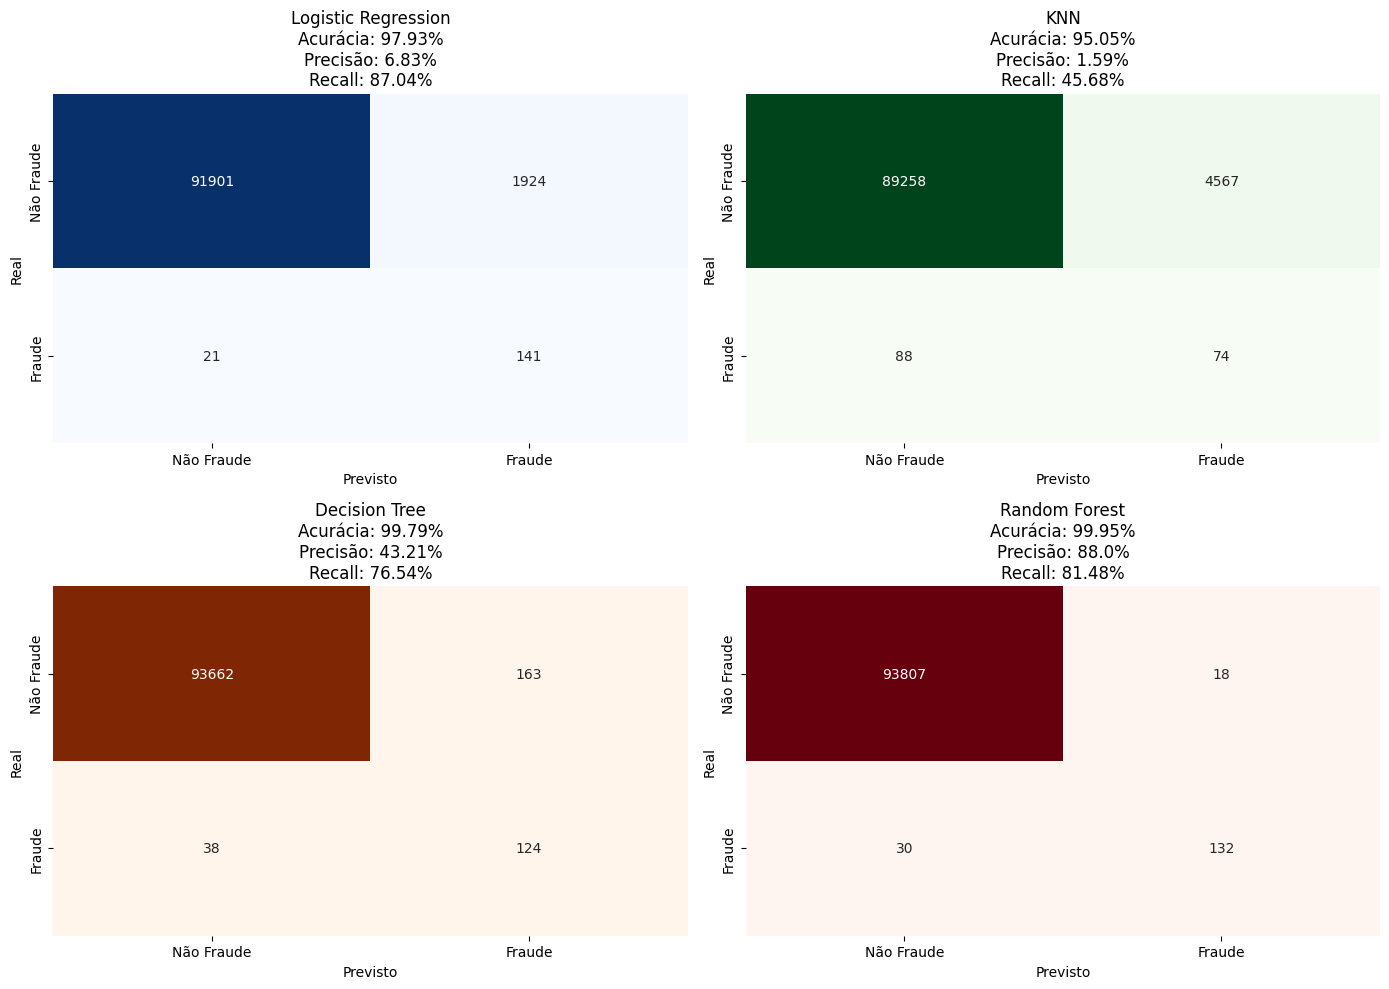

In [47]:
# Gráfico
predicts['adasyn'], predicts_proba['adasyn'] = table_score(X_ros_ada, X_test, y_ros_ada, y_test)

## ROC - Receiver Operating Characterist 

- ROC é uma representação gráfica que ilustra o desempenho (ou perfomance) de um sistema classificador binário e mede a sensibilidade e especifidade de um modelo

- Eixo X (1 - Especificidade): Representa a taxa de falsos positivos, ou seja, a proporção de instâncias negativas que foram incorretamente classificadas como positivas.

- Eixo Y (Sensibilidade ou Recall): Representa a taxa de verdadeiros positivos, ou seja, a proporção de instâncias positivas que foram corretamente classificadas como positivas.

- Um modelo perfeito teria uma Curva ROC que subisse verticalmente até o canto superior esquerdo, indicando 100% de Sensibilidade (nenhum falso negativo) e 100% de Especificidade (nenhum falso positivo).

- A área sob a Curva ROC (AUC-ROC) é uma métrica comum usada para resumir o desempenho geral do modelo. Quanto maior a AUC, melhor o modelo em discriminar entre as classes.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

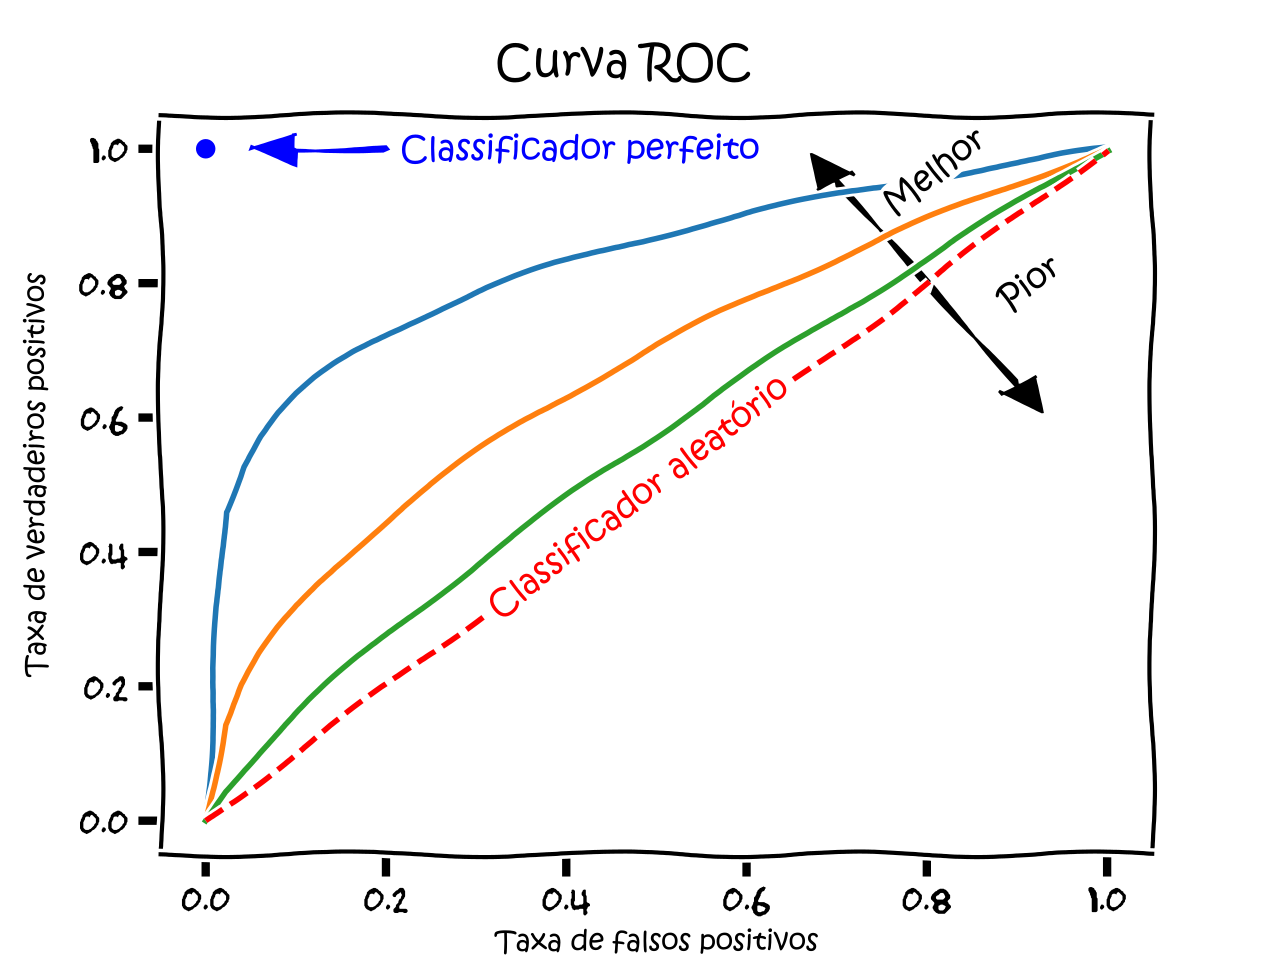

## Avaliação?
- Para decidirmos qual é o melhor modelo, é necessária uma relação entre precisão x recall entre os diversos modelos. Também é preciso pensar no problema de negócio envolvido. 

- Por exemplo até esta etapa do projeto, poderiamos selecionar o modelo de Machine Learning - DecisionTree realizando um RandomUnderSampling através do ClusterCentroids, pois foi o modelo que melhor previu os recall (TP) com 98% de previsão das fraudes. Em contra-partida teve apenas 0.22% de previsão com 25% de acúracia. Em nosso problema de negocio, isso significa que teriamos que ter uma enorme equipe para ligar ao cliente e confirmar se ocorreu uma fraude ou não com o cliente. Portanto para contornar esse problema seria interessante limitar esse modelo para prever transações acima de 1mi (que acertaria 98% das fraudes) e para evitar ter que contratar uma equipe enorme para confirmar com o cliente se ocorreu fraude (e também melhorar a experiencia do cliente sem ligações a todo momento) utilizar outro modelo para prever transações menores, sacrificando um pouco da eficiencia na previsão das fraudes, porem tem uma precisão maior dos dados. 

- E para o problema relatado acima, para facilitar a escolha de um modelo equilibrado entre recall e precisão, podemos análisar os melhores modelos atraves do gráfico de curva ROC.


## Comparando os modelos

In [48]:
from sklearn import metrics

In [49]:
dict_rename = {0: 'LR',
               1: 'KNN',
               2: 'DT',
               3: 'RF'}

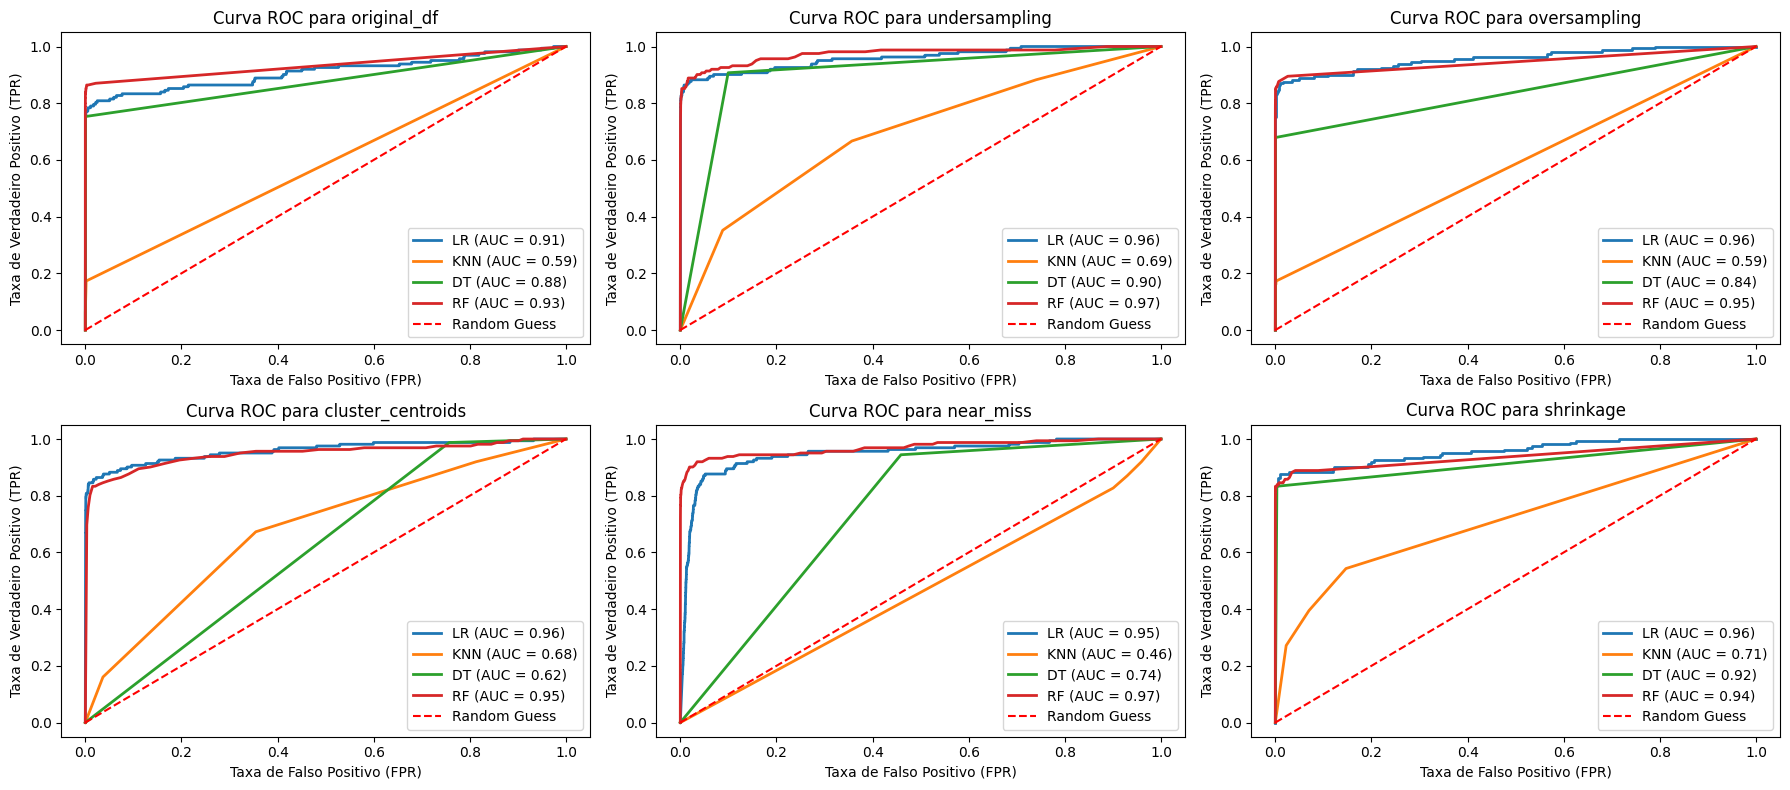

In [52]:
def plot_roc_curves(predicts, y_test):
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))

    for t, (model, predicts) in zip(axes.flatten(), predicts_proba.items()):
        
        for i, p in enumerate(predicts):
            fpr, tpr, _ = metrics.roc_curve(y_test, p)
            roc_auc = metrics.auc(fpr, tpr)
            i = dict_rename.get(i, f'{model}')
            t.plot(fpr, tpr, linewidth=2.0, label=f'{i} (AUC = {roc_auc:.2f})')
        
        t.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
        t.set_xlabel('Taxa de Falso Positivo (FPR)')
        t.set_ylabel('Taxa de Verdadeiro Positivo (TPR)')
        t.set_title(f'Curva ROC para {model}')
        t.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

plot_roc_curves(predicts_proba, y_test)

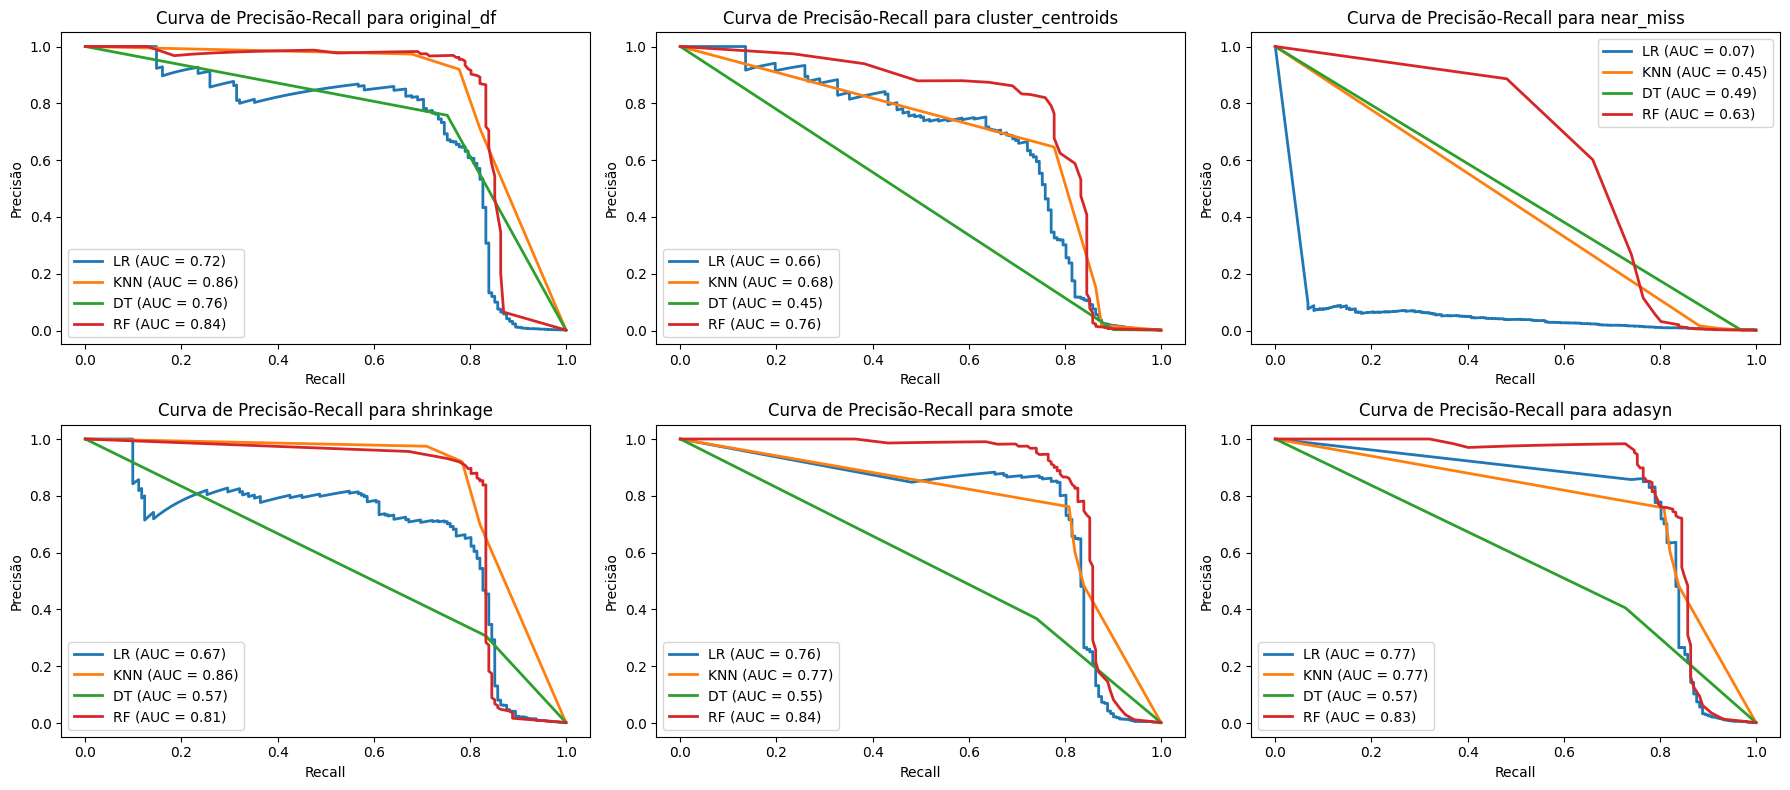

In [ ]:
def plot_precision_recall_curves(predicts_proba, y_test):
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    
    for t, (model, predicts) in enumerate(predicts_proba.items()):
        ax = axes[t // 3, t % 3]
        
        for i, p in enumerate(predicts):
            precision, recall, _ = metrics.precision_recall_curve(y_test, p)
            auc = metrics.auc(recall, precision)
            i= dict_rename.get(i, f'{model}')
            ax.plot(recall, precision, linewidth=2.0, label=f'{i} (AUC = {auc:.2f})')
        
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precisão')
        ax.set_title(f'Curva de Precisão-Recall para {model}')
        ax.legend(loc='best')
        
    plt.tight_layout()
    plt.show()


plot_precision_recall_curves(predicts_proba, y_test)

In [53]:
def calculate_metrics(predicts_proba, y_test):
    results = []
    for model, predicts in predicts_proba.items():
        for i, p in enumerate(predicts):
            p = np.array(p)
            precision, recall, _ = metrics.precision_recall_curve(y_test, p)
            auc = metrics.auc(recall, precision)
            i= dict_rename.get(i, f'{model}')
            results.append({
                'Model': model,
                'Curve': i,
                'AUC': auc
            })
    return pd.DataFrame(results)

In [54]:
metrics_df = calculate_metrics(predicts_proba, y_test)
metrics_df.head(50)

,Model,Curve,AUC
0,original_df,LR,0.638785
1,original_df,KNN,0.179324
2,original_df,DT,0.755638
3,original_df,RF,0.836615
4,undersampling,LR,0.672946
5,undersampling,KNN,0.179503
6,undersampling,DT,0.461530
7,undersampling,RF,0.730847
8,oversampling,LR,0.700301
9,oversampling,KNN,0.167297


In [55]:
metrics_df = calculate_metrics(predicts_proba, y_test)
metrics_df.head(50)

,Model,Curve,AUC
0,original_df,LR,0.638785
1,original_df,KNN,0.179324
2,original_df,DT,0.755638
3,original_df,RF,0.836615
4,undersampling,LR,0.672946
5,undersampling,KNN,0.179503
6,undersampling,DT,0.461530
7,undersampling,RF,0.730847
8,oversampling,LR,0.700301
9,oversampling,KNN,0.167297


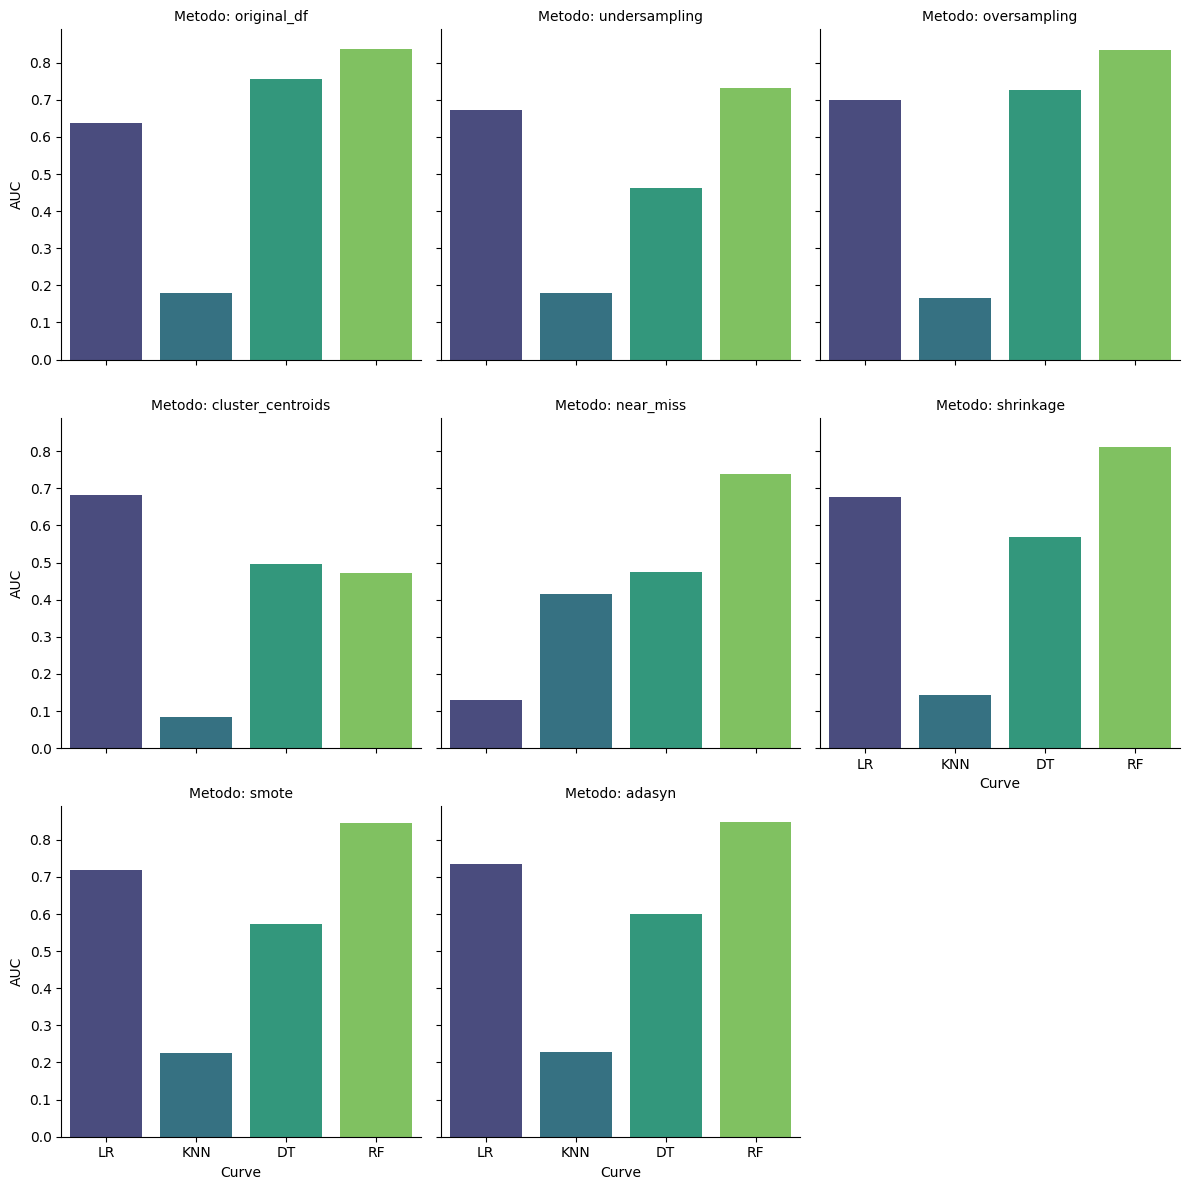

In [56]:
# Plotando o gráfico de barras para cada modelo e seu respectivo AUC
g = sns.FacetGrid(metrics_df, col='Model', col_wrap=3, height=4)
g.map(sns.barplot, 'Curve', 'AUC', palette='viridis')

g.set_axis_labels('Curve', 'AUC')
g.set_titles('Metodo: {col_name}')
plt.show()

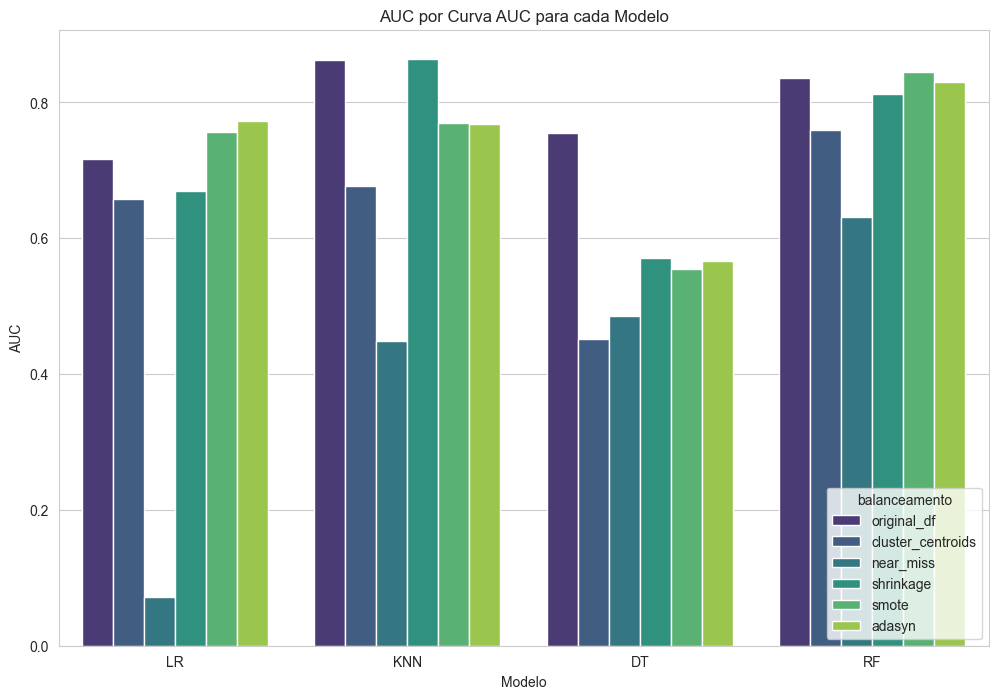

In [ ]:
palette = sns.color_palette("husl", 4)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df, x='Curve', y='AUC', hue='Model', palette='viridis')
plt.title('AUC por Curva ROC para cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('AUC')
plt.legend(title='balanceamento', loc='lower right')

plt.show()

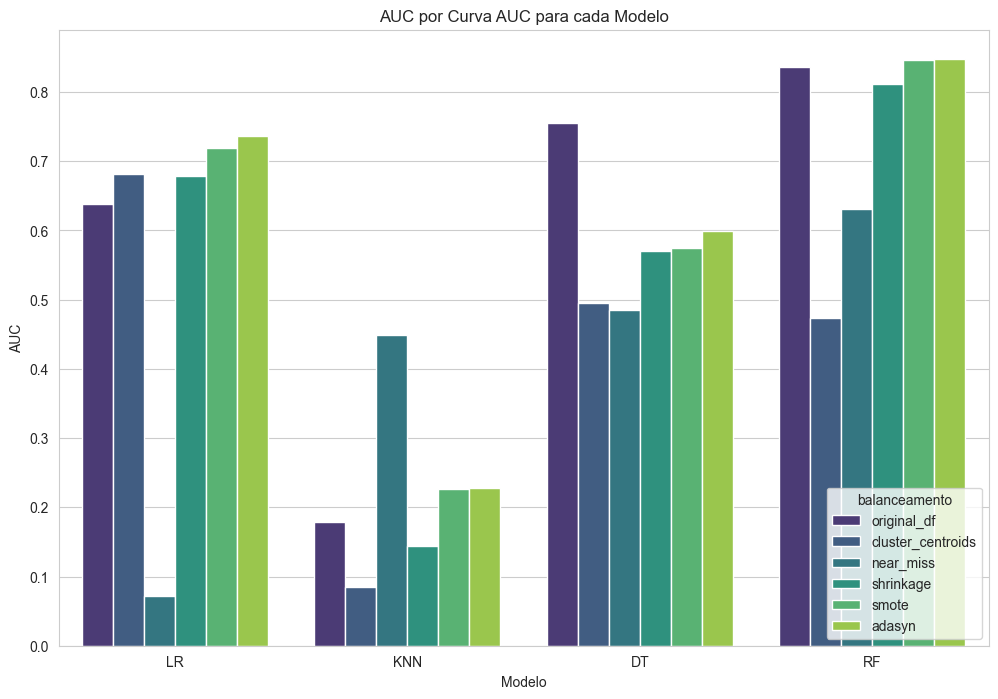

In [ ]:
palette = sns.color_palette("husl", 4)

# Criando o gráfico de barras para 
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df, x='Curve', y='AUC', hue='Model', palette='viridis')
plt.title('AUC por Curva ROC para cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('AUC')
plt.legend(title='balanceamento', loc='lower right')

plt.show()

### Conclusão dos tipos de balanceamento

Como já selecionamos o tipo de balanceamento e o modelo que melhor perfoma no recall (para transações acima de 1mi), após olhar algumas analises e estatisticas dos modelos, para as demais transaçõe será selecionado o tipo de balanceamento ADASYN e os modelos de RandomForest e LinearRegression para melhorar seus hyperparametros

Para tal feito, utilizaremos o GridSearchCV, que é um modulo da biblioteca scikit-learn que faz um teste cruzado com diversos parametros afim de verificar quais os melhores parametros para sua base de dados, de acordo com a avaliação escolhida 

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 1, 10, 20],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200],
    'class_weight': [None, 'balanced']
}

In [59]:
LR_adasyn = LogisticRegression(random_state=42)

In [60]:
clf_GS_adasyn = GridSearchCV(LR_adasyn, param_grid, scoring=['recall','precision'], refit='recall')
clf_GS_adasyn = clf_GS_adasyn.fit(X_ros_ada, y_ros_ada)

In [61]:
y_pred_GS_adasyn = clf_GS_adasyn.predict(X_test)

In [66]:
best_params = clf_GS_adasyn.best_params_
print("Melhores parâmetros encontrados:", best_params)

Melhores parâmetros encontrados: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [68]:
# Plotando gráfico com a matrix de confusão
def plot_confusion_matrix(y_test, y_pred, title):
    
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    rs = round(recall_score(y_test, y_pred) * 100, 2)
    
    ps = round(precision_score(y_test, y_pred) * 100, 2)
    
    cm = confusion_matrix(y_test, y_pred)
    
    labels = ['Não Fraude', 'Fraude']
    title = f'{title}\nAcurácia: {acc}%\nPrecisão: {ps}%\nRecall: {rs}%'
    
    fig, ax = plt.subplots() 
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=True,
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Previsto')
    ax.set_ylabel('Real')
    ax.set_title(title)

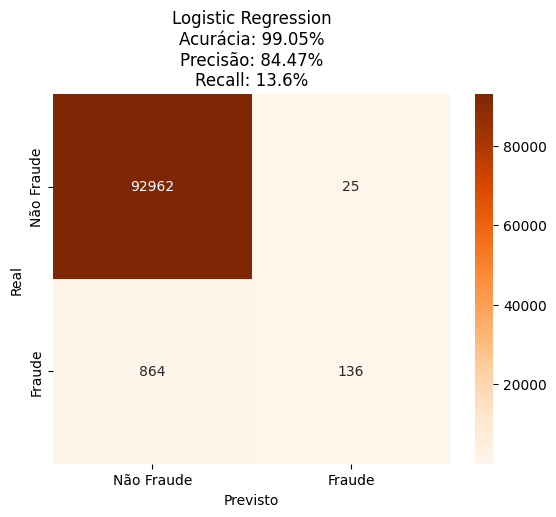

In [69]:
plot_confusion_matrix(y_pred_GS_adasyn, y_pred, 'Logistic Regression')

In [71]:
param_grid = {
    'max_depth': [None, 3, 5],
    'max_features': ['auto',  'log2'],
    'criterion': ['gini', 'entropy']
}

In [72]:
RF_adasyn = RandomForestClassifier(random_state=42)
clf_RF_adasyn = GridSearchCV(RF_adasyn, param_grid, scoring='recall')
clf_RF_adasyn = clf_RF_adasyn.fit(X_ros_ada, y_ros_ada)


In [73]:
y_pred_RF_adasyn = clf_RF_adasyn.predict(X_test)

In [74]:
best_params = clf_RF_adasyn.best_params_
print("Melhores parâmetros encontrados:", best_params)

Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2'}


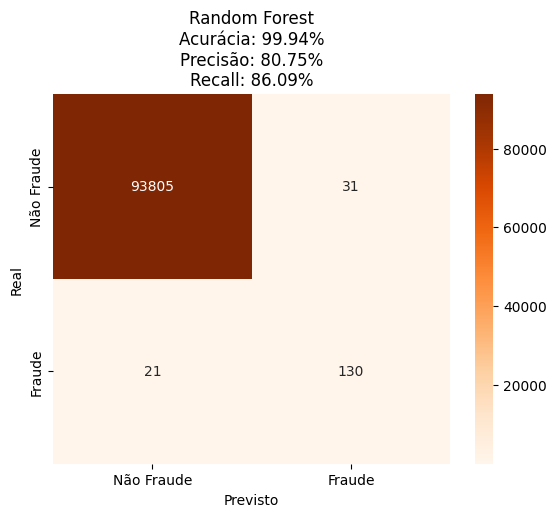

In [75]:
plot_confusion_matrix(y_pred_RF_adasyn, y_pred, 'Random Forest')

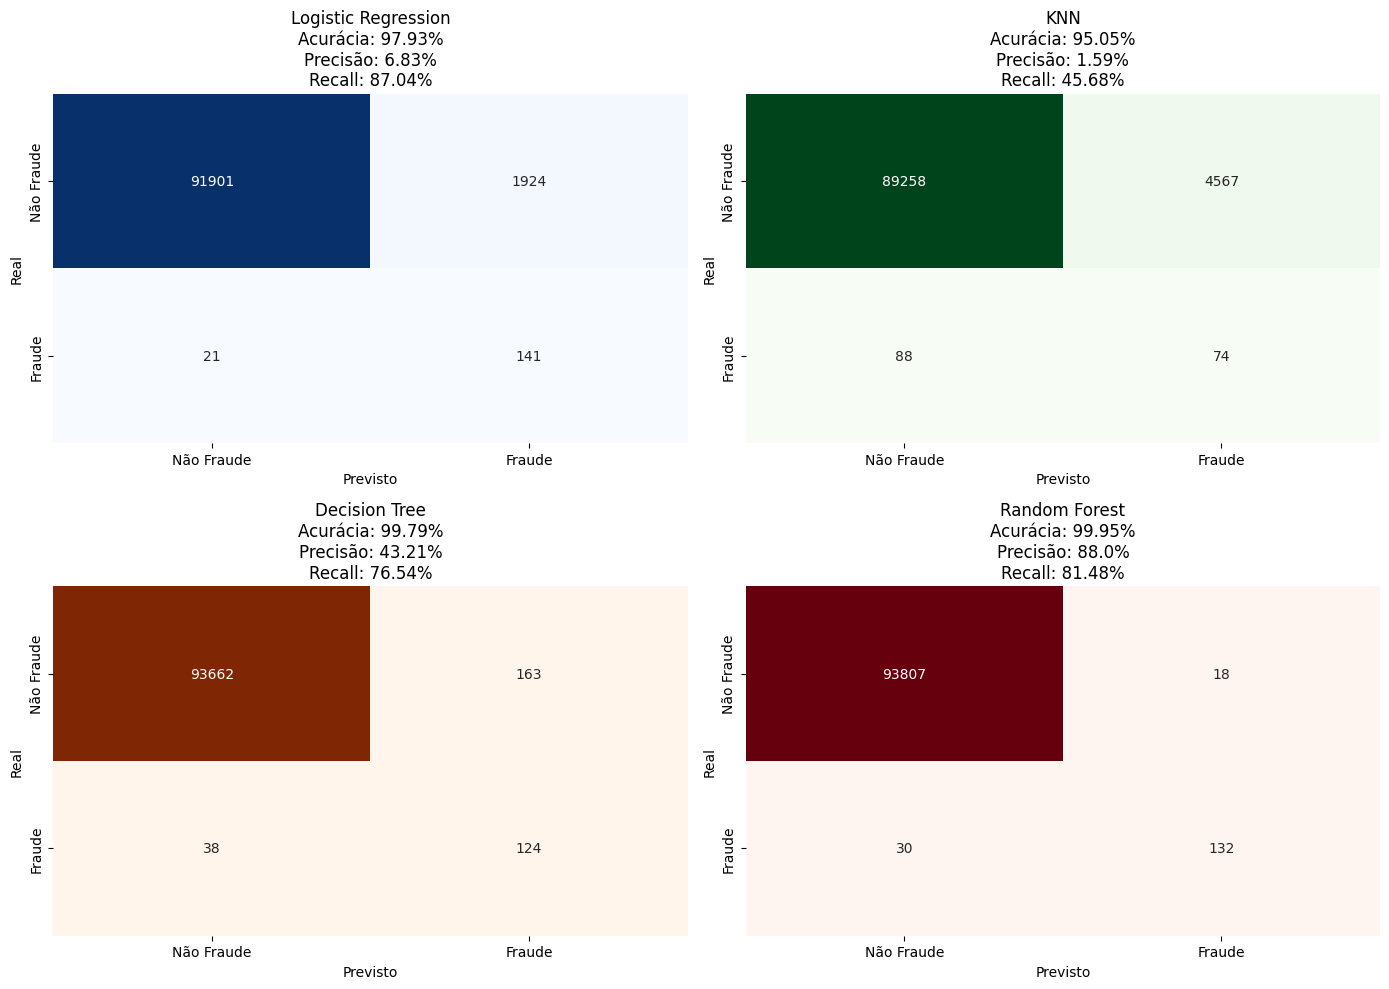

In [62]:
from imblearn.over_sampling import ADASYN

# Refazendo a amostra
ada = ADASYN(random_state=42)
X_ros_ada, y_ros_ada = ada.fit_resample(X_train, y_train)
predicts['adasyn'], predicts_proba['adasyn'] = table_score(X_ros_ada, X_test, y_ros_ada, y_test)

Testamos alguns hiperparametros (foram poucos por conta do tempo que estava sendo consumido para o treinamento). É importante ter em mente o tempo a disposição para a realização de um projeto em uma empresa visto que o tempo e o ativo mais valioso em qualquer empresa que exista no mundo.

Apos a escolha do melhor hiperparametro com a métrica que escolhemos, os modelo obteve uma melhora no recall e uma queda na precissão. Para esse caso, acredito que priorizar o recall seja mais importante, tornando mais eficiente a identificação de fraudes mesmo que haja um incomo maior aos clientes para a confirmação, a acurácia do modelo variou 0,01%. 